In [1048]:
import pandas as pd
import numpy as np
import copy
import itertools as itr
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 150

In [1034]:
def set_data_type_of_series(df):
    mask_for_datatyping = np.arange(len(df.columns))
    mask_for_datatyping = np.delete(mask_for_datatyping, np.arange(0, arr.size, 3))
    for j in mask_for_datatyping:
        if df.columns[j] != 'PR.29':
            df[df.columns[j]] = pd.to_numeric(df[df.columns[j]], errors='coerce', downcast='integer')
        else:
            break
    return df

def make_headers_by_year_and_label(year_start, year_end, label_lst): 
    x = np.array([np.arange(year_start,year_end)])
    year_headers = list(np.repeat(x, 3))
    year_header_p = []
    try:
        for i,j in enumerate(itr.cycle(label_lst)):
            year_header_p.append(j+str(year_headers[i]))
    except IndexError:
        pass
    return year_header_p

def rename_headers(df, new_names):
    old_names = list(df.columns)
    dictionary = dict(zip(old_names, new_names))
    df = df.rename(columns=dictionary)
    return df

def split_data_into_series(df_out, category):
    '''make a list of years and use format to build a separate df for trend analysis'''
    yrs = np.array([np.arange(1972,2015)])
    df_statuses = pd.DataFrame()
    for i in yrs[0]:
        df_statuses['{}'.format(i)] = df_out['{}.{}'.format(category, i)]
    df_statuses['Country'] = df_out['Country']
    df_statuses = df_statuses.set_index('Country')
    return df_statuses

def change_column_type(column_list, ctype):
    for i in list(df_insp.columns):
        try:
            df_insp[i] = df_insp[i].astype(ctype)
        except ValueError:
            pass

In [1039]:
data_in = pd.read_csv('FH_Country_and_Territory_Ratings_and_Statuses_1972-2016.csv', header=2)         
df = copy.copy(data_in)
df = df.rename(columns={'Unnamed: 0': 'Country'})
df.set_index('Country').head(1)
labels = ['PR.', 'CL.', 'Status.']
new_year_label_header = make_headers_by_year_and_label(1972, 2017, labels)
new_year_label_header.insert(0, "Country")
df_out = rename_headers(df, new_year_label_header)
df_stat = split_data_into_series(df_out, category='CL')

In [1040]:
df_insp = df_stat.T.reset_index()
df_insp.columns.values[0] = 'Date'
df_insp.columns = list(df_insp.columns)
df_insp['M-D'] = '-01-01'
df_insp['Date'] = df_insp['Date']+df_insp['M-D']
df_insp['Date'] = pd.to_datetime(df_insp['Date'])
df_insp = df_insp.set_index('Date')
del df_insp['M-D']

In [1041]:
change_column_type(df_insp, float)

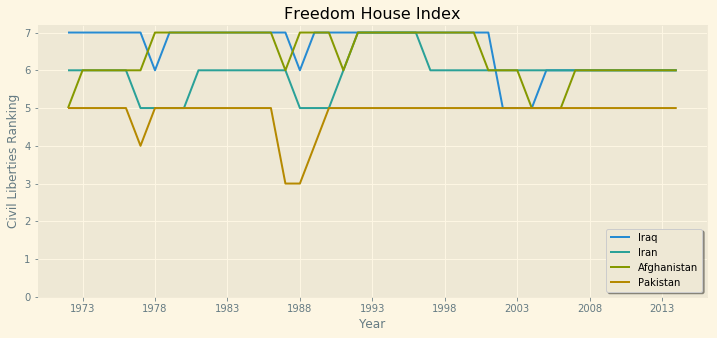

In [1089]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(12, 5))
    plt.plot(df_insp['1972':'2015']['Iraq'])
    plt.plot(df_insp['1972':'2015']['Iran'])
    plt.plot(df_insp['1972':'2015']['Afghanistan'])
    plt.plot(df_insp['1972':'2015']['Pakistan'])
    plt.ylabel('Civil Liberties Ranking')
    plt.xlabel('Year')
    plt.yticks(list(range(8)))
    plt.title('Freedom House Index')
    plt.legend(loc='lower right', shadow=True)